In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

sample_data  training.csv


In [3]:
df = pd.read_csv("/content/training.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [6]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:
df.shape

(4920, 133)

In [8]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

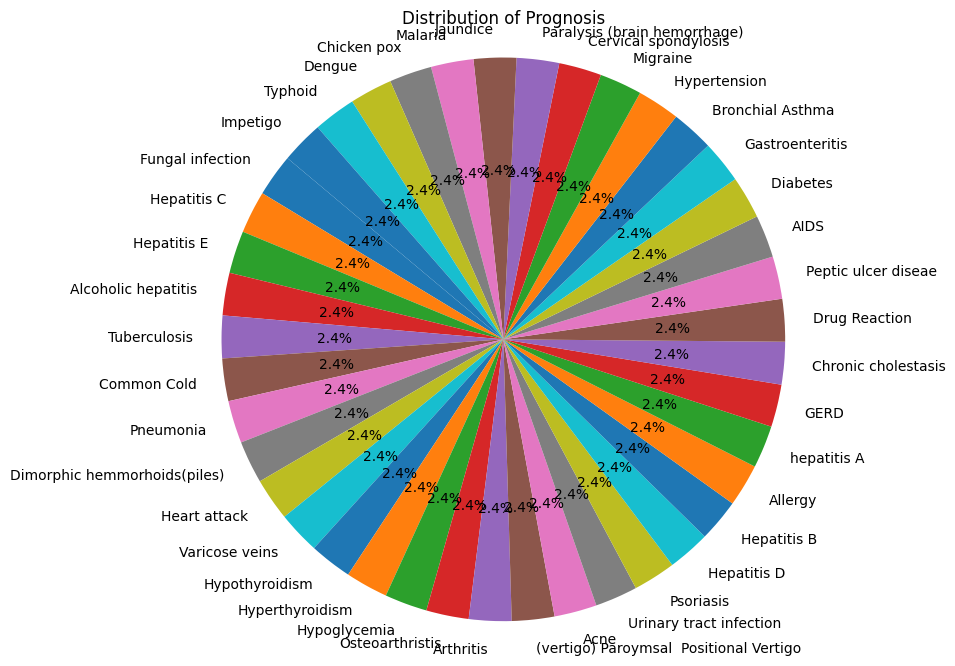

In [9]:
prognosis_counts = df['prognosis'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(prognosis_counts, labels=prognosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Prognosis')
plt.axis('equal')
plt.show()

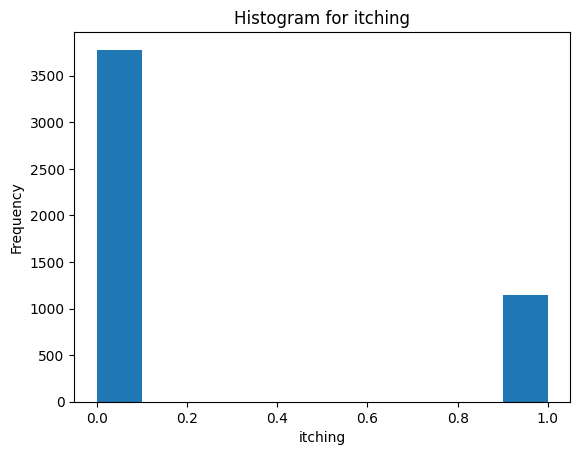

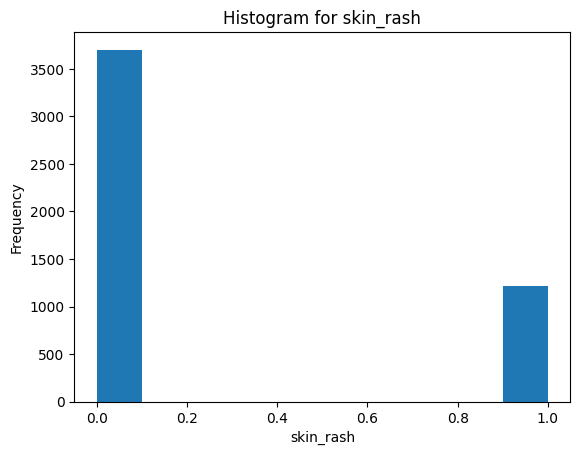

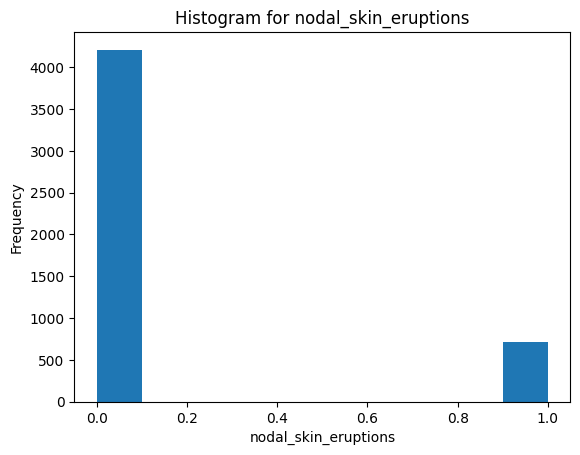

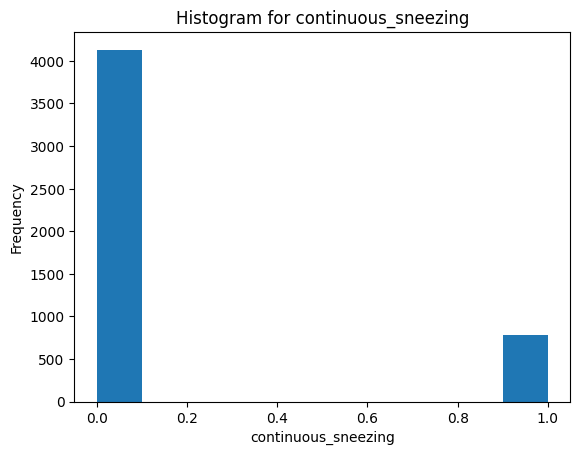

In [15]:
for column in columns_of_interest:
    plt.figure()
    df[column].plot.hist()
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

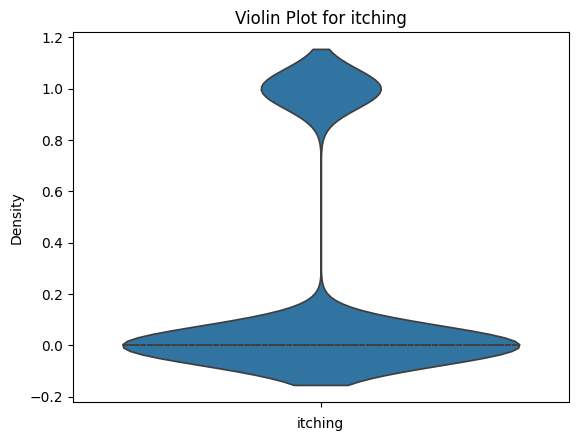

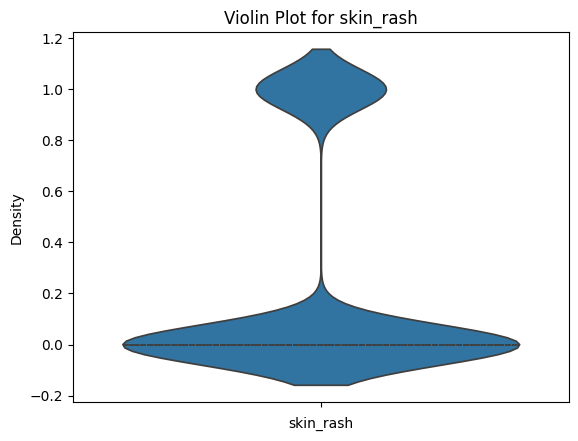

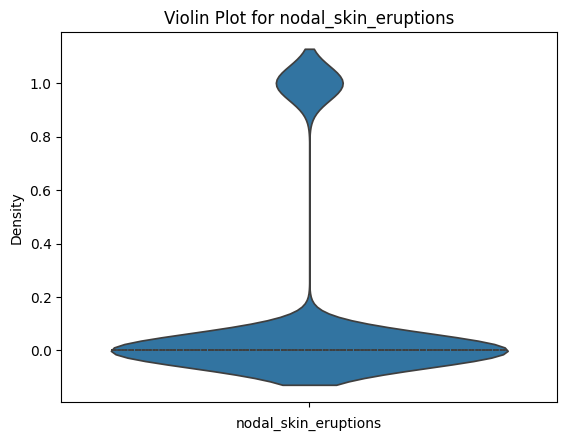

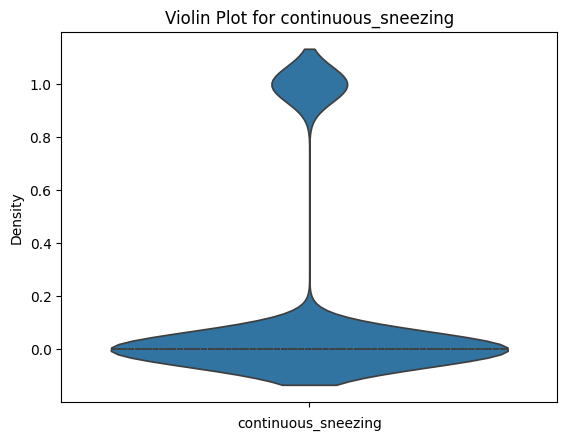

In [17]:
for column in columns_of_interest:
    plt.figure()
    sns.violinplot(data=df[column], inner='quartile')
    plt.title(f'Violin Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

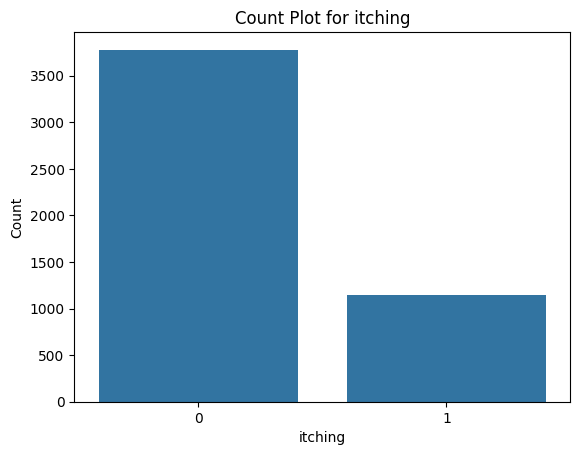

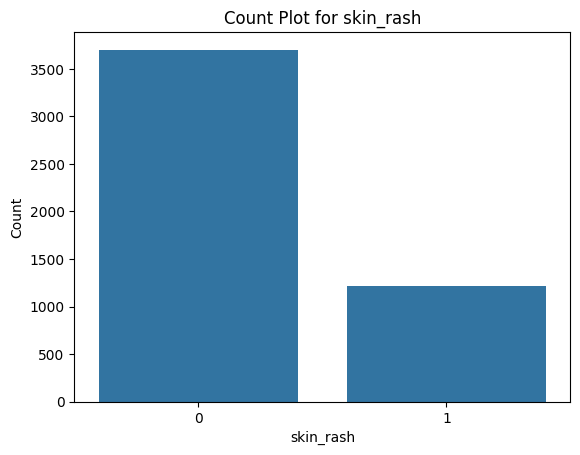

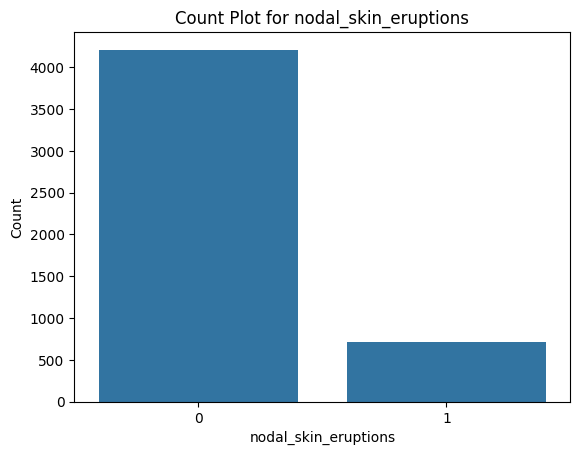

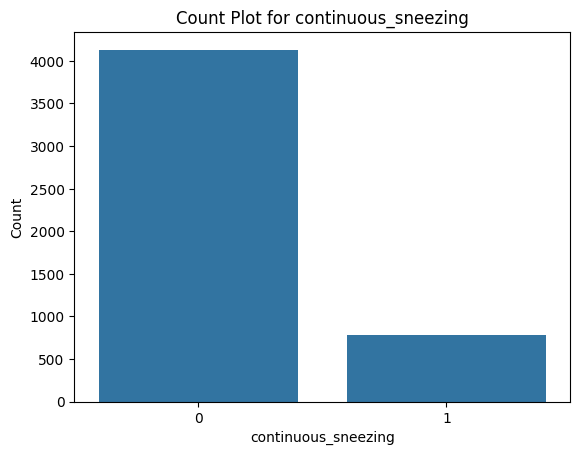

In [18]:
for column in columns_of_interest:
    plt.figure()
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

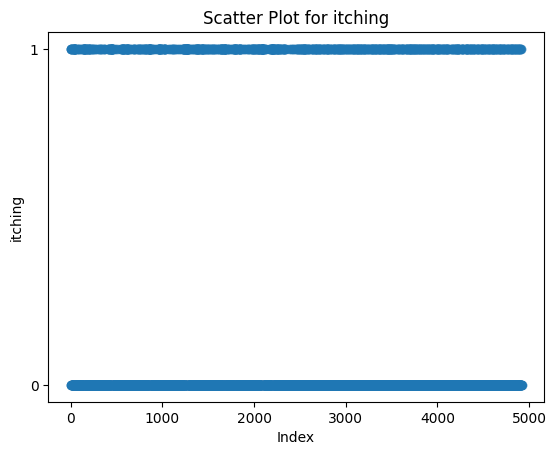

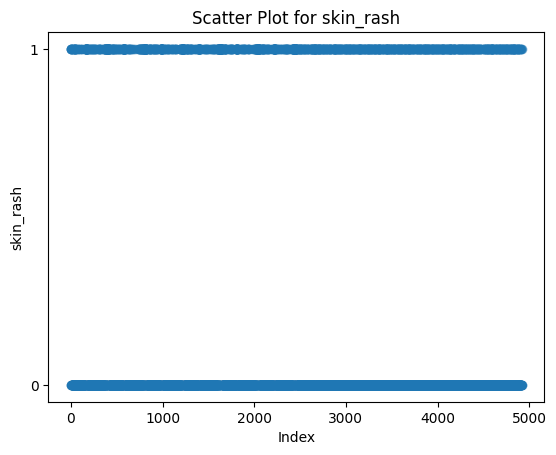

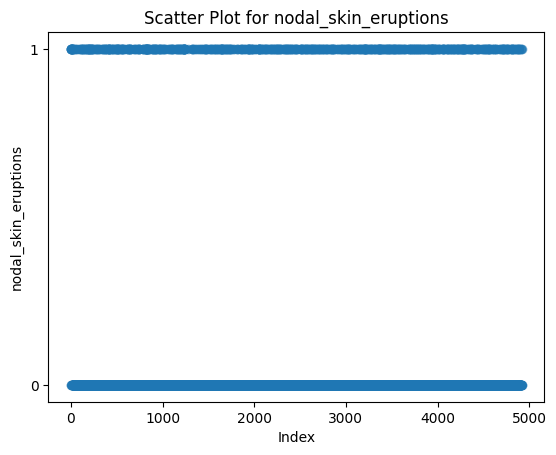

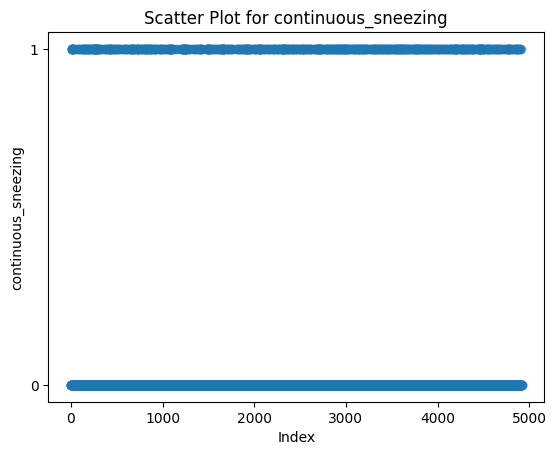

In [19]:
for column in columns_of_interest:
    plt.figure()
    plt.scatter(range(len(df)), df[column], alpha=0.5)
    plt.title(f'Scatter Plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.yticks([0, 1])
    plt.show()

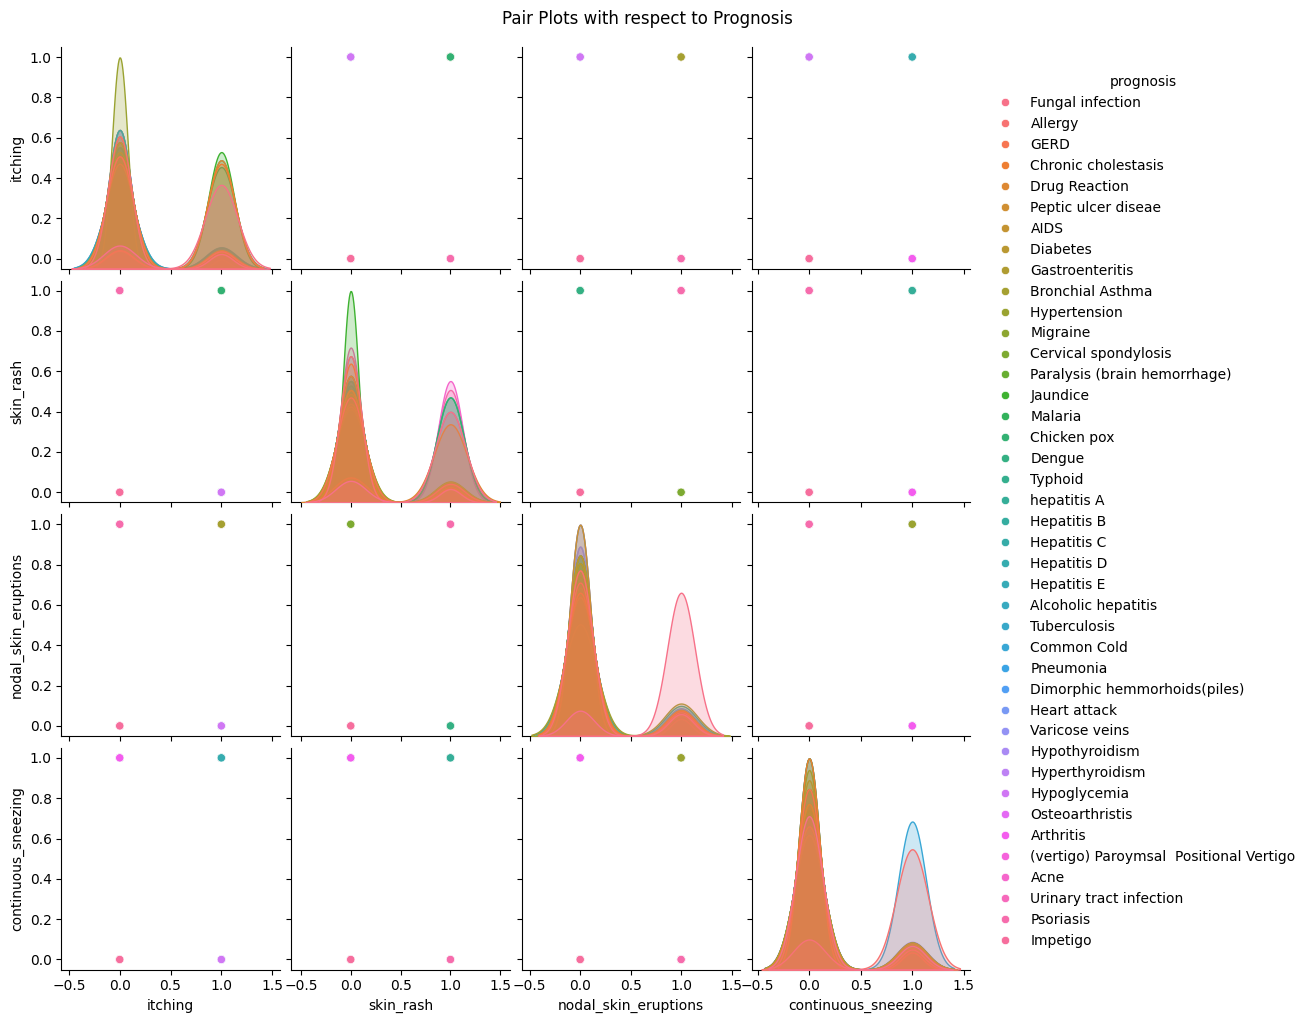

In [20]:
binary_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing']

columns_of_interest = binary_columns + ['prognosis']

df_subset = df[columns_of_interest]

sns.pairplot(df_subset, hue='prognosis', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plots with respect to Prognosis', y=1.02)
plt.show()

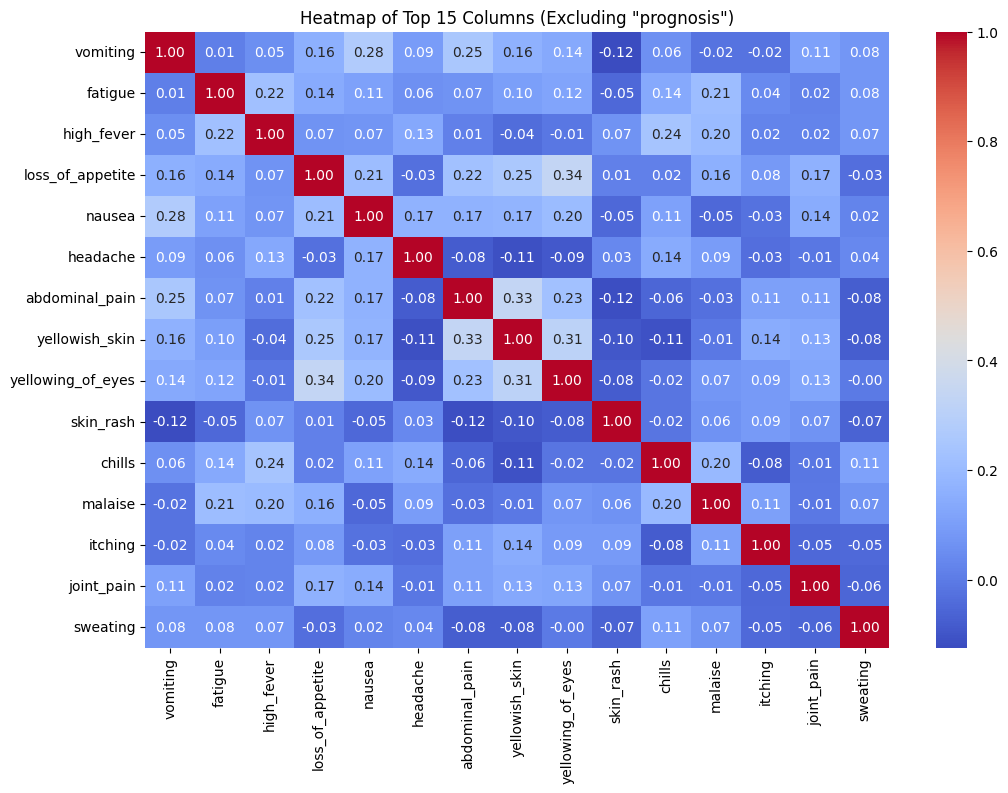

In [24]:
columns = df.drop(columns=['prognosis']).mean().nlargest(15).index

# Extract these columns from the DataFrame
df_top_15 = df[columns]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_top_15.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Top 15 Columns (Excluding "prognosis")')
plt.show()

The dataset is cleaned and ready to use for building ML model